In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('data\penguins.csv')

# Display unique species
unique_species = data['species'].unique()
print("Unique species:", unique_species)

# Filter the DataFrame for species "Gentoo"
gentoo_data = data[data['species'] == 'Gentoo']

# Display the first few rows of the filtered DataFrame
print("Gentoo species data:")
print(gentoo_data.head())

print()

# Display summary statistics for the filtered DataFrame
print("Summary statistics for Gentoo species:")
print()
print(gentoo_data.describe())

Unique species: ['Adelie' 'Chinstrap' 'Gentoo']
Gentoo species data:
    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
219  Gentoo  Biscoe            46.1           13.2                211   
220  Gentoo  Biscoe            50.0           16.3                230   
221  Gentoo  Biscoe            48.7           14.1                210   
222  Gentoo  Biscoe            50.0           15.2                218   
223  Gentoo  Biscoe            47.6           14.5                215   

     body_mass_g     sex  
219         4500  FEMALE  
220         5700    MALE  
221         4450  FEMALE  
222         5700    MALE  
223         5400    MALE  

Summary statistics for Gentoo species:

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      123.000000     123.000000         123.000000   123.000000
mean        47.504878      14.982114         217.186992  5076.016260
std          3.081857       0.981220           6.484976   504.116237
min         4

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Josef\AppData\Local\Temp\ipykernel_28600\2219319559.py:7: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv('data\penguins.csv')


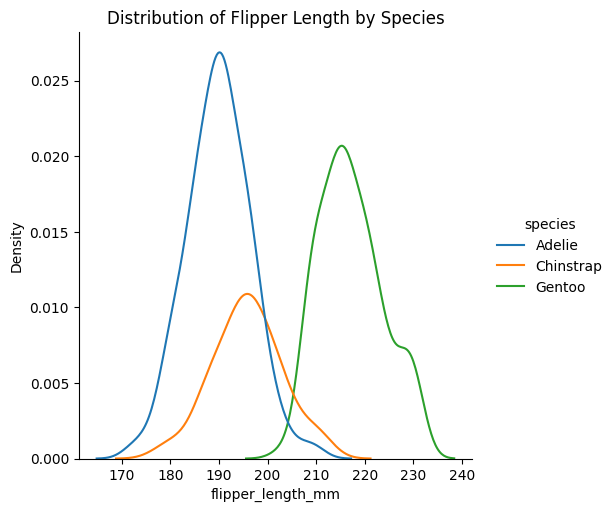

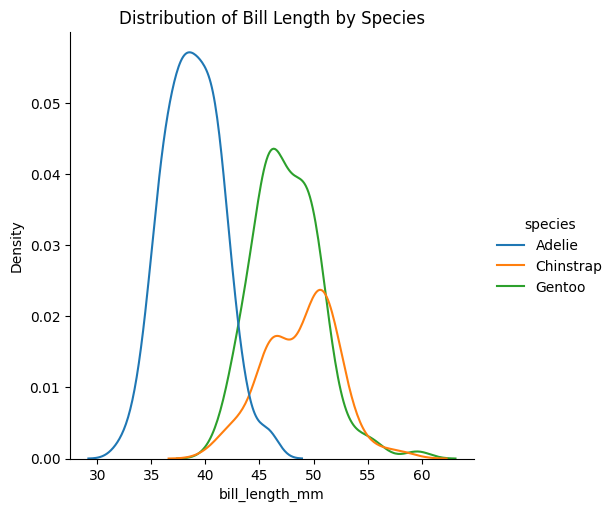

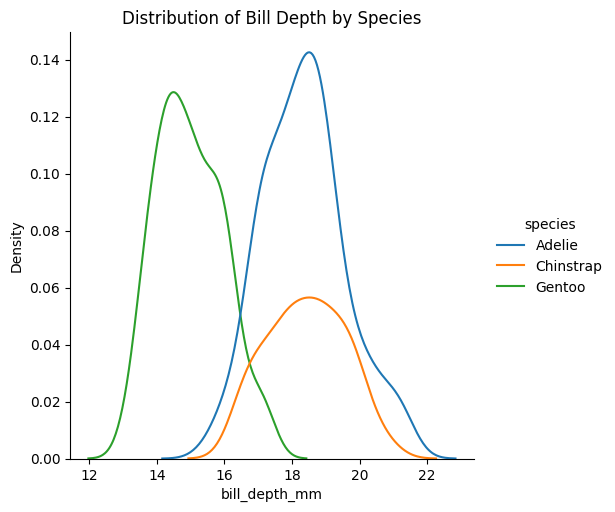

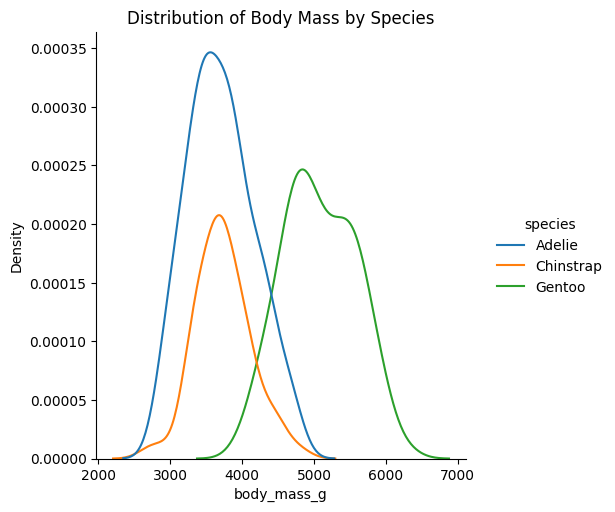

In [18]:
# Plot the distribution of flipper_length_mm with species as hue
sns.displot(data, x="flipper_length_mm", hue="species", kind="kde")
plt.title("Distribution of Flipper Length by Species")
plt.show()

# Plot the distribution of other attributes
sns.displot(data, x="bill_length_mm", hue="species", kind="kde")
plt.title("Distribution of Bill Length by Species")
plt.show()

sns.displot(data, x="bill_depth_mm", hue="species", kind="kde")
plt.title("Distribution of Bill Depth by Species")
plt.show()

sns.displot(data, x="body_mass_g", hue="species", kind="kde")
plt.title("Distribution of Body Mass by Species")
plt.show()

In [19]:
# The messed csv file.
data2 = pd.read_csv("data/penguins2.csv")

# Ensure 'species' column is treated as string
data2['species'] = data2['species'].astype(str)

# Standardize species names by converting to lowercase and stripping whitespace
data2['species'] = data2['species'].str.lower().str.strip()

# Correct specific redundant species names
data2['species'] = data2['species'].replace({
    'adelie.': 'adelie',
    'gentoo.': 'gentoo',
    'chinstrap.': 'chinstrap'
})

# Convert data types to appropriate formats
# Assuming 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', and 'body_mass_g' should be numeric
data2['flipper_length_mm'] = data2['flipper_length_mm'].astype(np.float64)
data2['bill_length_mm'] = data2['bill_length_mm'].astype(np.float64)
data2['bill_depth_mm'] = data2['bill_depth_mm'].astype(np.float64)
data2['body_mass_g'] = data2['body_mass_g'].astype(np.float64)

# Separate numeric and non-numeric columns
numeric_cols = data2.select_dtypes(include=['number']).columns
non_numeric_cols = data2.select_dtypes(exclude=['number']).columns

# Fill NaN values in numeric columns with the mean
data2[numeric_cols] = data2[numeric_cols].fillna(data2[numeric_cols].mean())

# Fill NaN values in non-numeric columns with a placeholder (e.g., 'unknown')
data2[non_numeric_cols] = data2[non_numeric_cols].fillna('unknown')

# Display the cleaned data
print(data2.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  adelie  Torgersen       39.100000      18.700000         181.000000   
1  adelie  Torgersen       39.500000      17.400000         186.000000   
2  adelie  Torgersen       40.300000      18.000000         195.000000   
3     nan  Torgersen       43.976471      17.184295         201.203175   
4  adelie  Torgersen       43.976471      19.300000         193.000000   

   body_mass_g      sex  
0  3750.000000     Male  
1  3800.000000   Female  
2  4191.831683   Female  
3  4191.831683  unknown  
4  3450.000000   Female  


In [20]:
# Ensure 'species' column is treated as string
data2['species'] = data2['species'].astype(str)

# Standardize species names by converting to lowercase and stripping whitespace
data2['species'] = data2['species'].str.lower().str.strip()

# List all unique species
unique_species = data2['species'].unique()
print("Unique species before correction:", unique_species)

# Define a function to correct redundant species names
def correct_species(species):
    corrections = {
        'adelie.': 'adelie',
        'gentoo.': 'gentoo',
        'chinstrap.': 'chinstrap',
        'adelie': 'adelie',
        'gentoo': 'gentoo',
        'chinstrap': 'chinstrap'
    }
    return corrections.get(species, species)

# Apply the function to correct species names
data2['species'] = data2['species'].apply(correct_species)

# List all unique species after correction
unique_species_corrected = data2['species'].unique()
print("Unique species after correction:", unique_species_corrected)

# Convert data types to appropriate formats
data2['flipper_length_mm'] = data2['flipper_length_mm'].astype(np.float64)
data2['bill_length_mm'] = data2['bill_length_mm'].astype(np.float64)
data2['bill_depth_mm'] = data2['bill_depth_mm'].astype(np.float64)
data2['body_mass_g'] = data2['body_mass_g'].astype(np.float64)

# Separate numeric and non-numeric columns
numeric_cols = data2.select_dtypes(include=['number']).columns
non_numeric_cols = data2.select_dtypes(exclude=['number']).columns

# Fill NaN values in numeric columns with the mean
data2[numeric_cols] = data2[numeric_cols].fillna(data2[numeric_cols].mean())

# Fill NaN values in non-numeric columns with a placeholder (e.g., 'unknown')
data2[non_numeric_cols] = data2[non_numeric_cols].fillna('unknown')

# Display the cleaned data
print(data2.head())

Unique species before correction: ['adelie' 'nan' 'chintrap' 'chinstrap' 'gentoo' 'gento']
Unique species after correction: ['adelie' 'nan' 'chintrap' 'chinstrap' 'gentoo' 'gento']
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  adelie  Torgersen       39.100000      18.700000         181.000000   
1  adelie  Torgersen       39.500000      17.400000         186.000000   
2  adelie  Torgersen       40.300000      18.000000         195.000000   
3     nan  Torgersen       43.976471      17.184295         201.203175   
4  adelie  Torgersen       43.976471      19.300000         193.000000   

   body_mass_g      sex  
0  3750.000000     Male  
1  3800.000000   Female  
2  4191.831683   Female  
3  4191.831683  unknown  
4  3450.000000   Female  


C:\Users\Josef\AppData\Local\Temp\ipykernel_28600\1602865146.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_estimation_proximal.fillna(method='ffill', inplace=True)


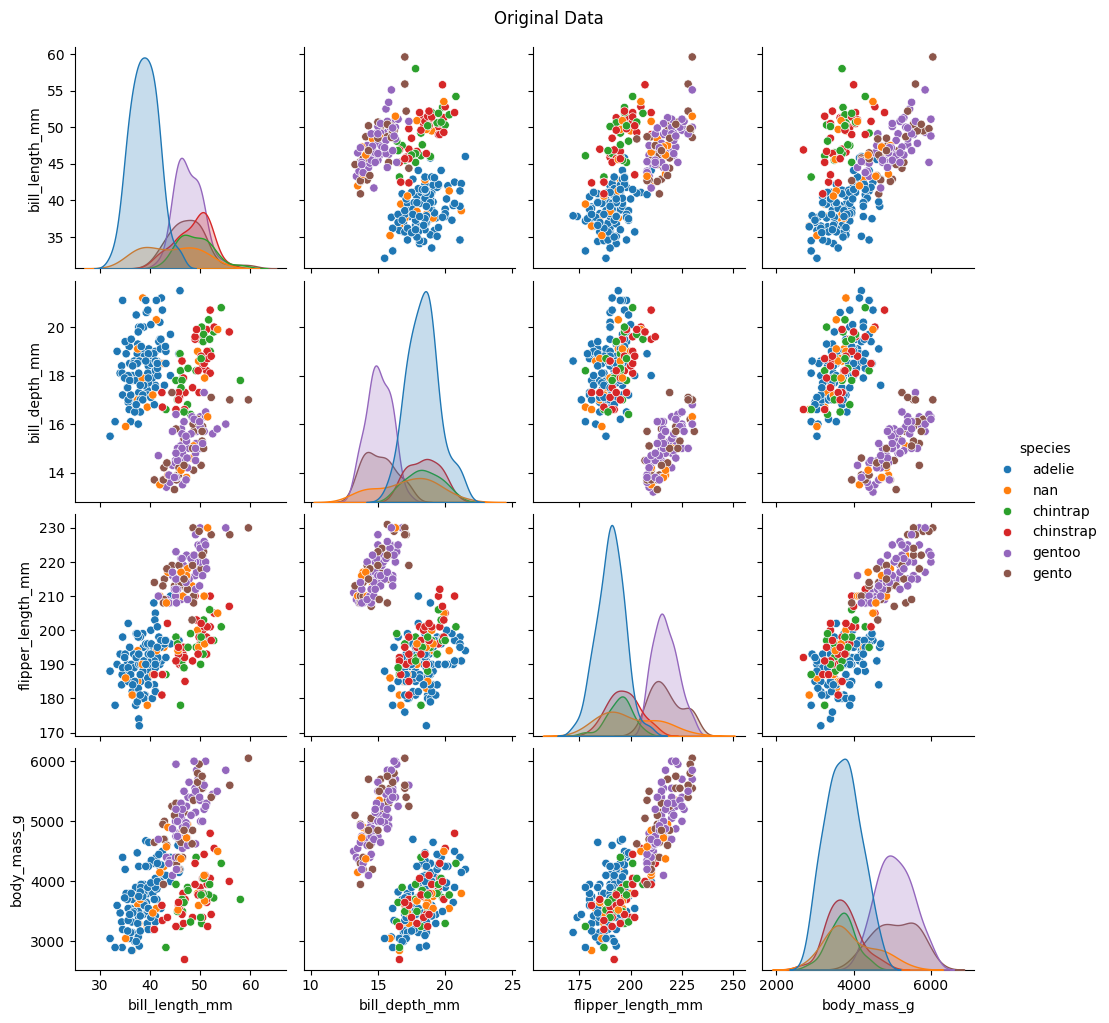

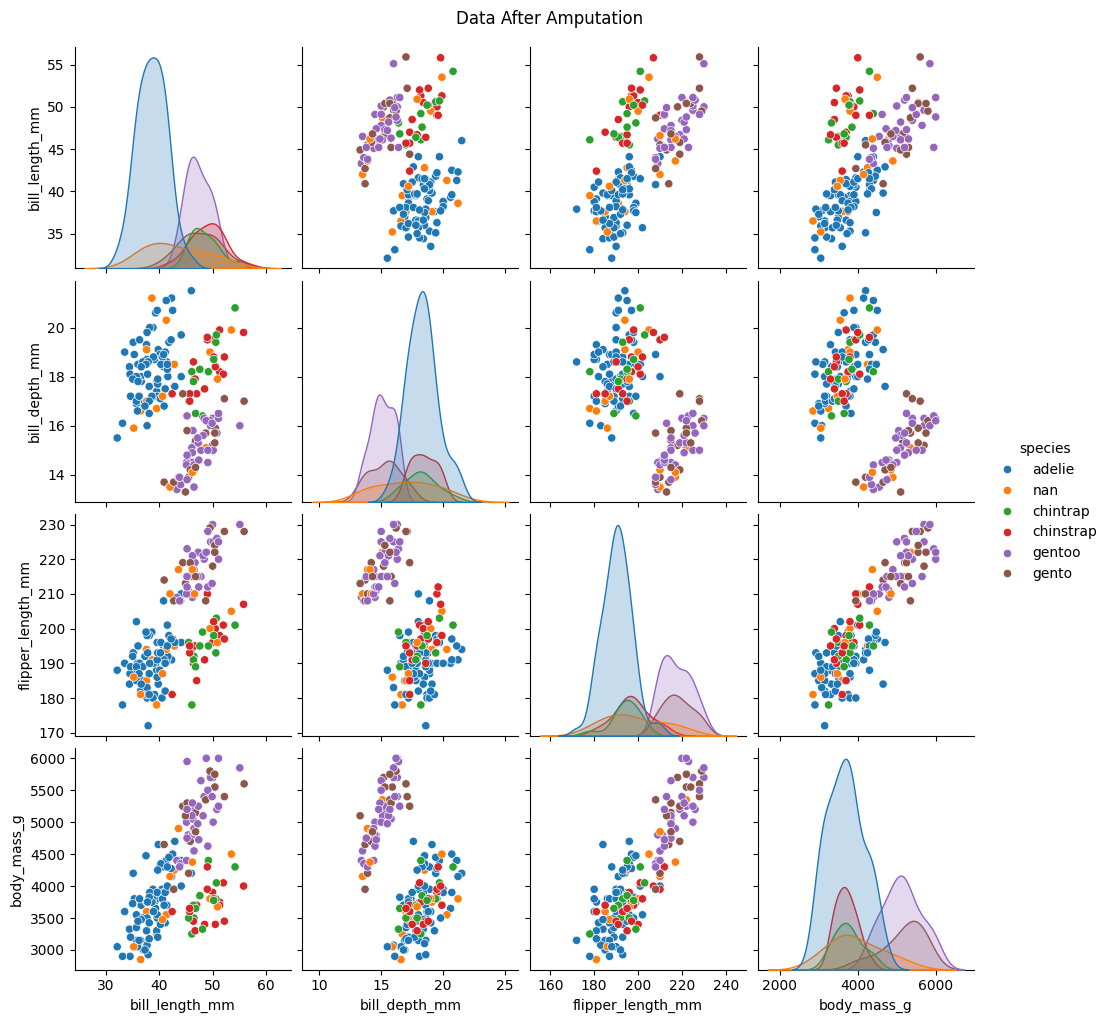

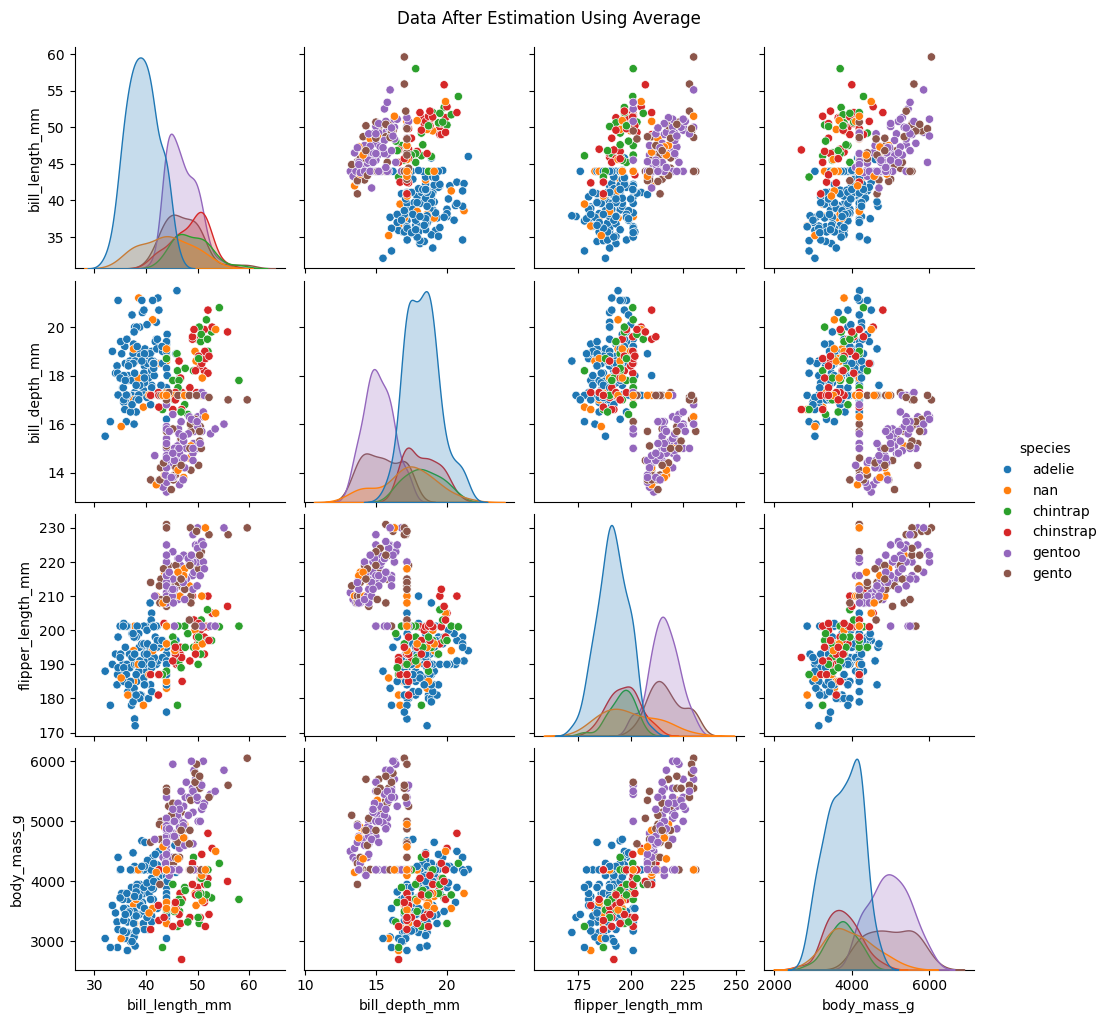

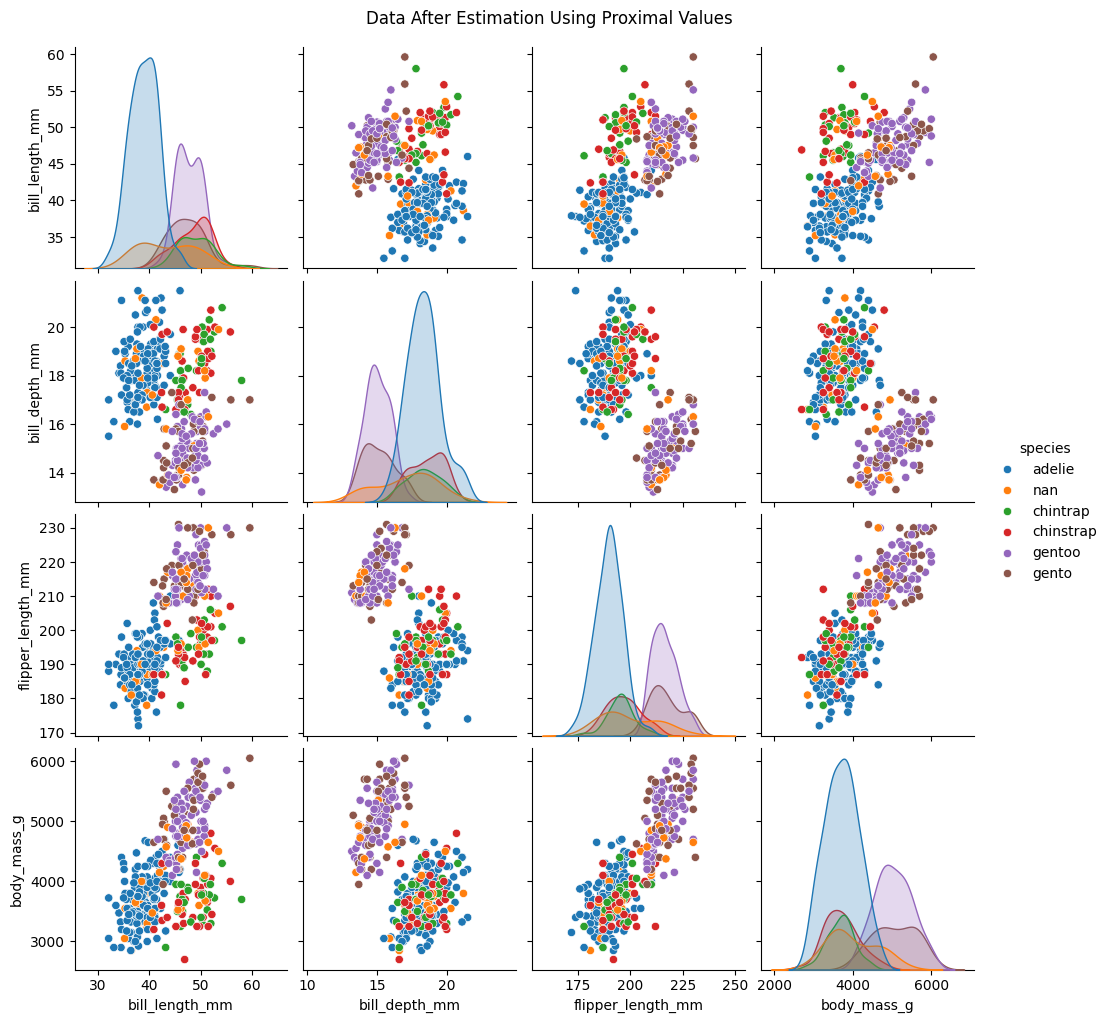

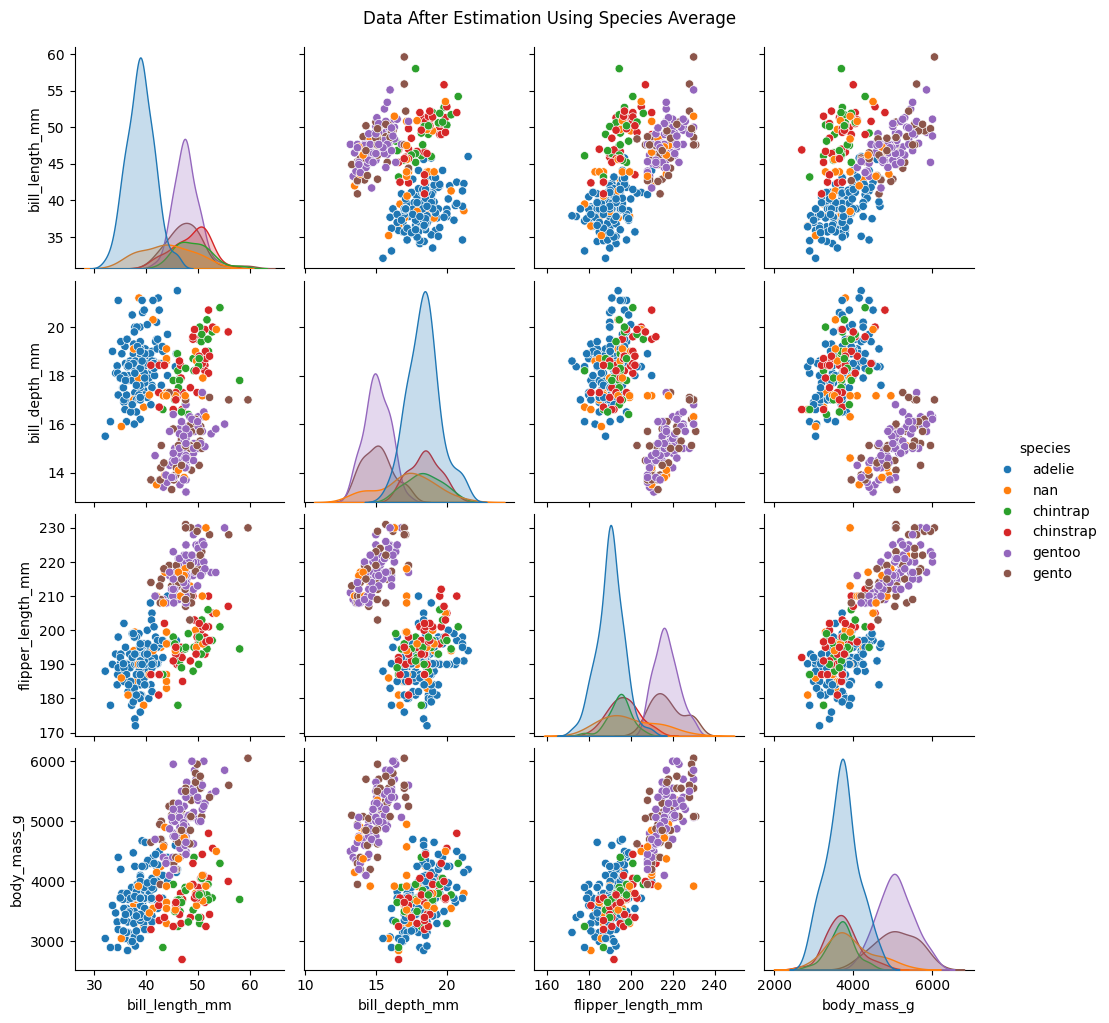

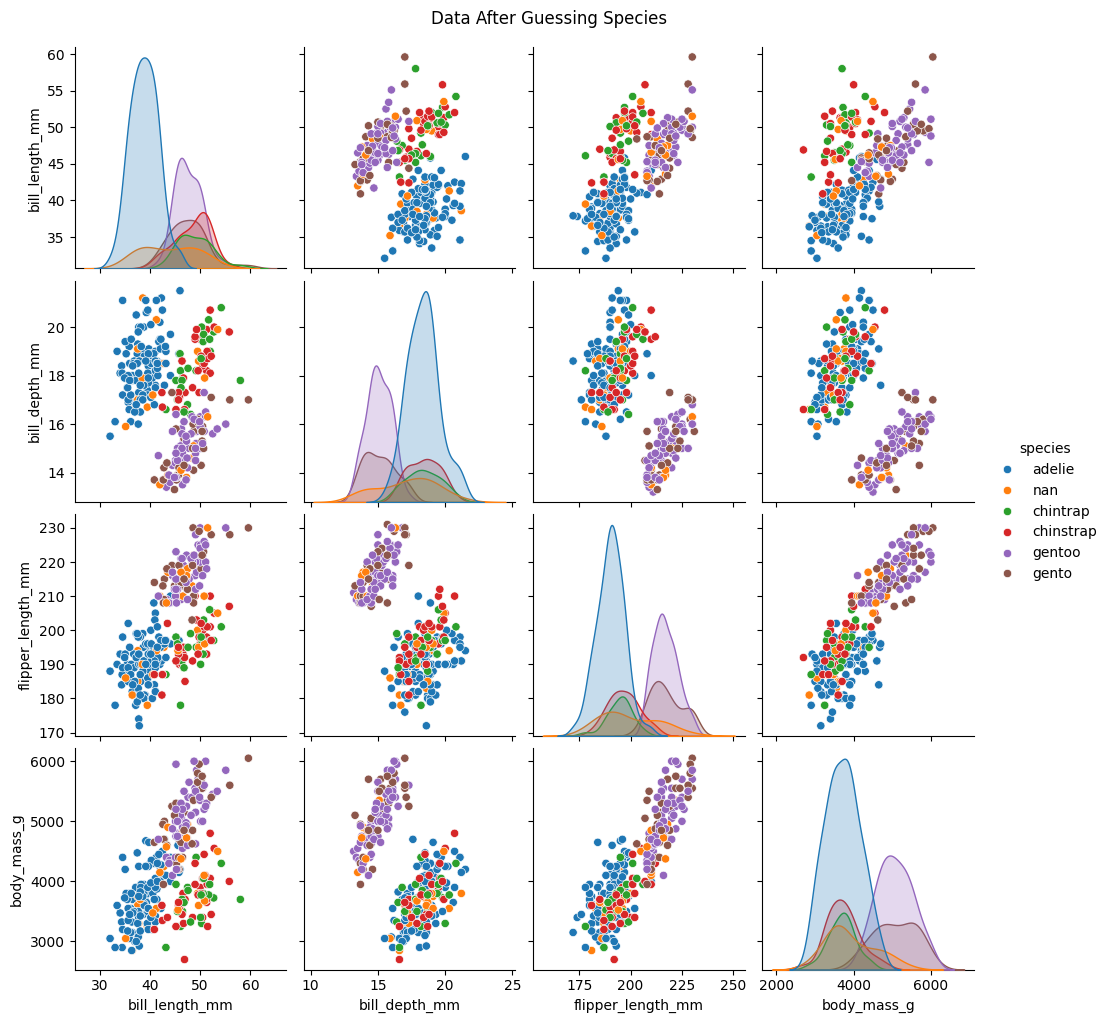

In [24]:
# Ensure 'species' column is treated as string
data2['species'] = data2['species'].astype(str)

# Standardize species names by converting to lowercase and stripping whitespace
data2['species'] = data2['species'].str.lower().str.strip()

# Define a function to correct redundant species names
def correct_species(species):
    corrections = {
        'adelie.': 'adelie',
        'gentoo.': 'gentoo',
        'chinstrap.': 'chinstrap',
        'adelie': 'adelie',
        'gentoo': 'gentoo',
        'chinstrap': 'chinstrap'
    }
    return corrections.get(species, species)

# Apply the function to correct species names
data2['species'] = data2['species'].apply(correct_species)

# Function to clean non-numeric values in numeric columns
def clean_numeric_column(column):
    return pd.to_numeric(column, errors='coerce')

# Clean and convert data types to appropriate formats
data2['flipper_length_mm'] = clean_numeric_column(data2['flipper_length_mm'])
data2['bill_length_mm'] = clean_numeric_column(data2['bill_length_mm'])
data2['bill_depth_mm'] = clean_numeric_column(data2['bill_depth_mm'])
data2['body_mass_g'] = clean_numeric_column(data2['body_mass_g'])

# (a) Data Amputation: Remove rows with NaN values
data_amputation = data2.dropna()

# (b) Data Estimation: Using average
data_estimation_avg = data2.copy()
numeric_cols = data_estimation_avg.select_dtypes(include=[np.number]).columns
data_estimation_avg[numeric_cols] = data_estimation_avg[numeric_cols].fillna(data_estimation_avg[numeric_cols].mean())

# (b) Data Estimation: Using proximal values (forward fill)
data_estimation_proximal = data2.copy()
data_estimation_proximal.fillna(method='ffill', inplace=True)

# (Extra) Data Estimation: Using average within each species
data_estimation_species_avg = data2.copy()
for species in data_estimation_species_avg['species'].unique():
    species_data = data_estimation_species_avg[data_estimation_species_avg['species'] == species]
    numeric_cols = species_data.select_dtypes(include=[np.number]).columns
    species_mean = species_data[numeric_cols].mean()
    data_estimation_species_avg.loc[data_estimation_species_avg['species'] == species, numeric_cols] = species_data[numeric_cols].fillna(species_mean)

# Plotting the corrected data using Seaborn
def plot_data(data, title):
    sns.pairplot(data, hue='species')
    plt.suptitle(title, y=1.02)
    plt.show()

# Plot original data
plot_data(data2, "Original Data")

# Plot data after amputation
plot_data(data_amputation, "Data After Amputation")

# Plot data after estimation using average
plot_data(data_estimation_avg, "Data After Estimation Using Average")

# Plot data after estimation using proximal values
plot_data(data_estimation_proximal, "Data After Estimation Using Proximal Values")

# Plot data after estimation using species average
plot_data(data_estimation_species_avg, "Data After Estimation Using Species Average")

# (d) Routine to guess the species for data with unknown species
def guess_species(data):
    known_species_data = data[data['species'] != 'unknown']
    unknown_species_data = data[data['species'] == 'unknown']
    
    for index, row in unknown_species_data.iterrows():
        distances = known_species_data.apply(lambda x: np.linalg.norm(x[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']] - row[['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']]), axis=1)
        closest_species = known_species_data.loc[distances.idxmin()]['species']
        data.at[index, 'species'] = closest_species
    
    return data

# Extract data with missing 'species' data
data_with_unknown_species = data2[data2['species'] == 'unknown']

# Complete the missing data using averages of the physical characteristics of each species
data_completed_species = guess_species(data2.copy())

# Plot data after guessing species
plot_data(data_completed_species, "Data After Guessing Species")